# Vikrant Rajput

# Task-6 : Prediction using Decision Tree  Algorithm
### GRIP@TheSparkFoundation

# Import Libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Data
- drop id column

In [25]:
dataset = pd.read_csv('Iris.csv')
df = dataset.drop(['Id'],axis=1)
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

- look at data

In [26]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [28]:
df.describe

<bound method NDFrame.describe of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]>

- It don't have any *None* Value and don't need the feature scaling
### Change label data into numrical data

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# training and test data

In [40]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)

# Choose Model (Decision Tree)

In [41]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

# Plot Decision Tree

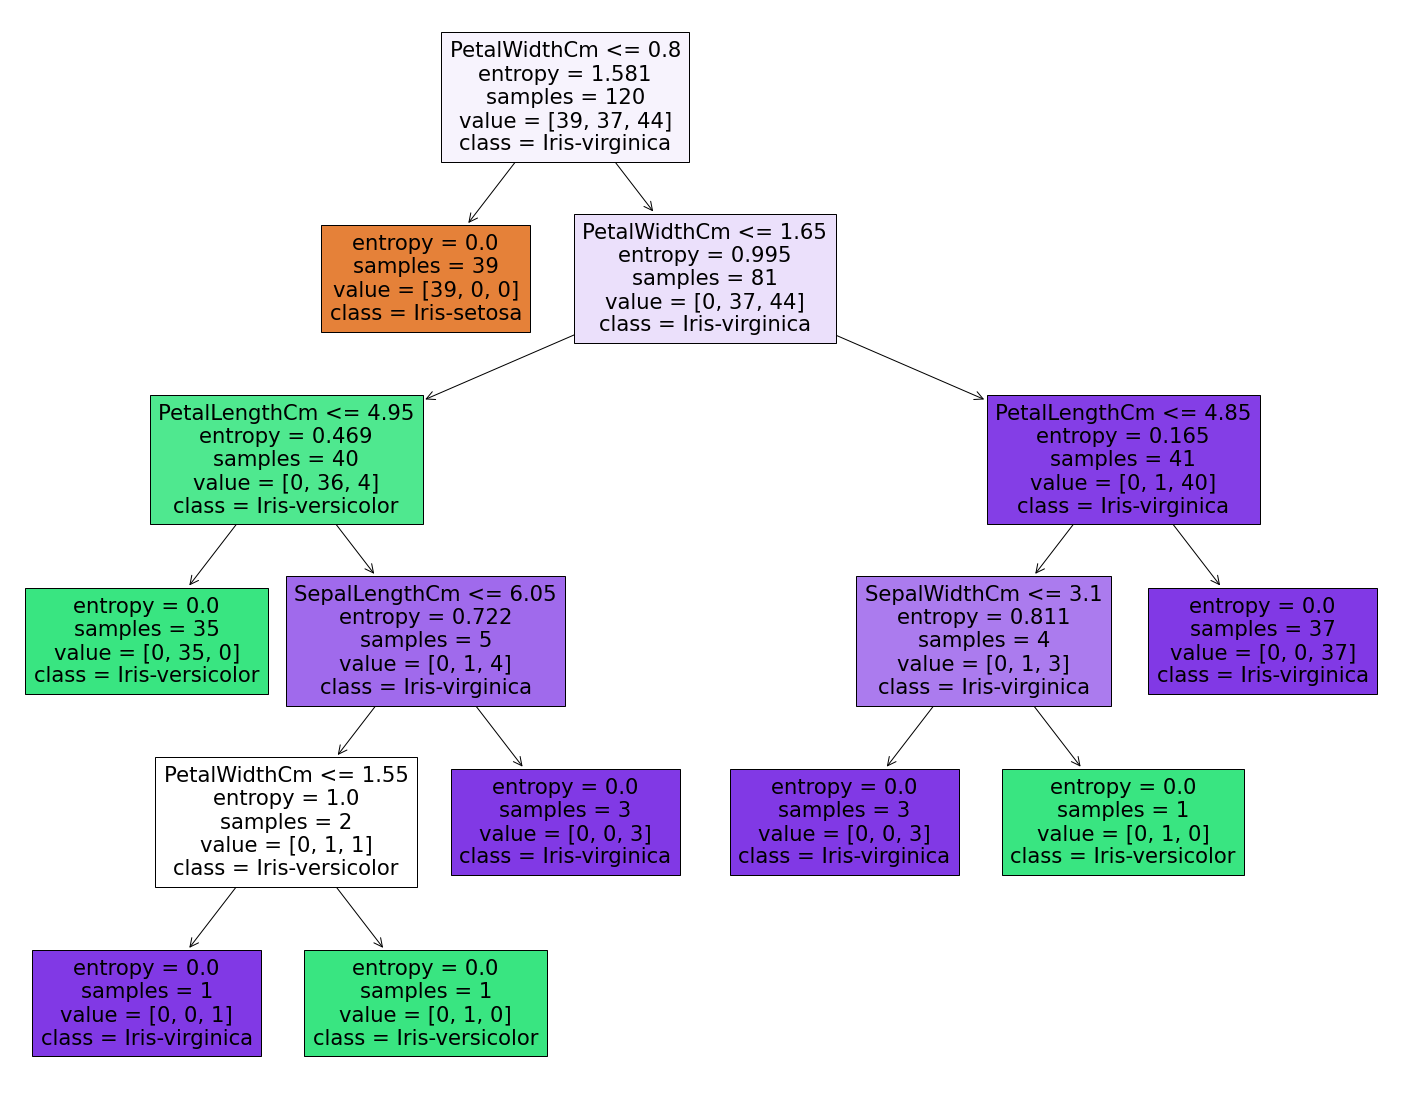

In [42]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier, 
                   feature_names=('SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'),  
                   class_names=('Iris-setosa','Iris-versicolor','Iris-virginica'),
                   filled=True)

# Predict test data

In [43]:
y_pred = classifier.predict(x_test)
df2 = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred,'T&F':y_test==y_pred})
df2

,y_test,y_pred,T&F
0,0,0,True
1,1,1,True
2,1,1,True
3,0,0,True
4,2,2,True
5,1,1,True
6,2,2,True
7,0,0,True
8,0,0,True
9,2,2,True


# Accuracy

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
np.round(accuracy_score(y_test, y_pred), 2)

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


0.97

# Custom Prediction

In [49]:
print(le.inverse_transform(classifier.predict(([[6.4,3.2,5.3,2.3]]))))

['Iris-virginica']


# Thank You!!!!!!!